<a href="https://colab.research.google.com/github/elaefry/TubesTKC/blob/main/neural_network/ISIC_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/TKC/archive (1).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
import zipfile
import shutil
import numpy as np
import glob
import random
import pandas as pd
import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import pathlib
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [4]:
!pip install Augmentor

In [5]:
import Augmentor
path_to_training_dataset = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
class_names=['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory='/kaggle/working/upsampled/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) 

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/upsampled/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB56AC1F3D0>: 100%|██████████| 1000/1000 [00:38<00:00, 25.91 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/upsampled/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB56FEAB650>: 100%|██████████| 1000/1000 [00:37<00:00, 26.43 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/upsampled/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB56FE9A950>: 100%|██████████| 1000/1000 [00:39<00:00, 25.42 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/upsampled/melanoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FB56ABFD350>: 100%|██████████| 1000/1000 [03:02<00:00,  5.47 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/upsampled/nevus/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB56ACF1B10>: 100%|██████████| 1000/1000 [03:01<00:00,  5.51 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/upsampled/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB56ADC9310>: 100%|██████████| 1000/1000 [00:37<00:00, 26.52 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/upsampled/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB57C89CA10>: 100%|██████████| 1000/1000 [01:31<00:00, 10.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/upsampled/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB56FEA4590>: 100%|██████████| 1000/1000 [00:39<00:00, 25.50 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/upsampled/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB56AC2A090>: 100%|██████████| 1000/1000 [00:38<00:00, 25.72 Samples/s]


In [7]:
output_dir = pathlib.Path('/kaggle/working/upsampled')

In [8]:
class1 =  glob.glob('/kaggle/working/upsampled/melanoma/output/*.jpg')
class2 =  glob.glob('/kaggle/working/upsampled/squamous cell carcinoma/output/*.jpg')
class3 =  glob.glob('/kaggle/working/upsampled/pigmented benign keratosis/output/*.jpg')
class4 =  glob.glob('/kaggle/working/upsampled/dermatofibroma/output/*.jpg')
class5 =  glob.glob('/kaggle/working/upsampled/nevus/output/*.jpg')
class6 =  glob.glob('/kaggle/working/upsampled/seborrheic keratosis/output/*.jpg')
class7 =  glob.glob('/kaggle/working/upsampled/basal cell carcinoma/output/*.jpg')
class8 =  glob.glob('/kaggle/working/upsampled/squamous cell carcinoma/output/*.jpg')
class9 =  glob.glob('/kaggle/working/upsampled/vascular lesion/output/*.jpg')

class1_df = []
class2_df = []
class3_df = []
class4_df = []
class5_df = []
class6_df = []
class7_df = []
class8_df = []
class9_df = []

for i in class1:
    class1_df.append([i,'actinic keratosis'])

for i in class2:
    class2_df.append([i,'basal cell carcinoma'])
    
for i in class3:
    class3_df.append([i,'dermatofibroma'])

for i in class4:
    class4_df.append([i,'melanoma'])
    
for i in class5:
    class5_df.append([i,'nevus'])
    
for i in class6:
    class6_df.append([i,'pigmented benign keratosis'])

for i in class7:
    class7_df.append([i,'seborrheic keratosis'])

for i in class8:
    class8_df.append([i,'squamous cell carcinoma'])

for i in class9:
    class9_df.append([i,'vascular lesion'])

In [9]:
df=class1_df+class2_df+class3_df+class4_df+class5_df+class6_df+class7_df+class8_df+class9_df
random.shuffle(df)
data_df = pd.DataFrame(df, columns = ['path','label'])

In [10]:
data_df

,path,label
0,/kaggle/working/upsampled/nevus/output/nevus_o...,nevus
1,/kaggle/working/upsampled/nevus/output/nevus_o...,nevus
2,/kaggle/working/upsampled/basal cell carcinoma...,seborrheic keratosis
3,/kaggle/working/upsampled/seborrheic keratosis...,pigmented benign keratosis
4,/kaggle/working/upsampled/nevus/output/nevus_o...,nevus
...,...,...
8995,/kaggle/working/upsampled/vascular lesion/outp...,vascular lesion
8996,/kaggle/working/upsampled/melanoma/output/mela...,actinic keratosis
8997,/kaggle/working/upsampled/squamous cell carcin...,squamous cell carcinoma
8998,/kaggle/working/upsampled/basal cell carcinoma...,seborrheic keratosis


In [11]:
datagen = ImageDataGenerator(
                             height_shift_range=0.2,
                             width_shift_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

train_generator = datagen.flow_from_dataframe(data_df,
                                              x_col='path',
                                              y_col='label',
                                              images_size=(180,180),
                                              class_mode='categorical',
                                              color_mode='rgb',
                                              subset='training')

validation_generator = datagen.flow_from_dataframe(data_df,
                                                   x_col='path',
                                                   y_col='label',
                                                   images_size=(180,180),
                                                   class_mode='categorical',
                                                   color_mode='rgb',
                                                   subset='validation')

Found 7200 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [12]:
import PIL

from PIL import Image
image = PIL.Image.open("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026575.jpg")


width, height = image.size


print(width, height)

600 450


In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  
  image_size=(256,256),
  )

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  
  image_size=(256,256),
  )

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
model = keras.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(layers.Conv2D(32, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(layers.Conv2D(64, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(layers.Conv2D(128, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(layers.Conv2D(256, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(9))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0

In [19]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
history = model.fit(train_ds,
                               epochs=30,
                               validation_data=val_ds)

Epoch 1/30
225/225 [==============================] - 83s 124ms/step - loss: 1.8156 - acc: 0.2682 - val_loss: 1.6430 - val_acc: 0.3267
Epoch 2/30
225/225 [==============================] - 21s 94ms/step - loss: 1.4553 - acc: 0.4264 - val_loss: 1.3613 - val_acc: 0.4694
Epoch 3/30
225/225 [==============================] - 21s 93ms/step - loss: 1.2885 - acc: 0.5061 - val_loss: 1.2060 - val_acc: 0.5444
Epoch 4/30
225/225 [==============================] - 21s 93ms/step - loss: 1.1169 - acc: 0.5836 - val_loss: 1.0407 - val_acc: 0.5989
Epoch 5/30
225/225 [==============================] - 21s 93ms/step - loss: 0.9110 - acc: 0.6594 - val_loss: 0.8699 - val_acc: 0.6839
Epoch 6/30
225/225 [==============================] - 21s 93ms/step - loss: 0.6929 - acc: 0.7432 - val_loss: 0.6916 - val_acc: 0.7528
Epoch 7/30
225/225 [==============================] - 21s 93ms/step - loss: 0.5580 - acc: 0.8021 - val_loss: 0.6385 - val_acc: 0.7722
Epoch 8/30
225/225 [==============================] - 21s 93m

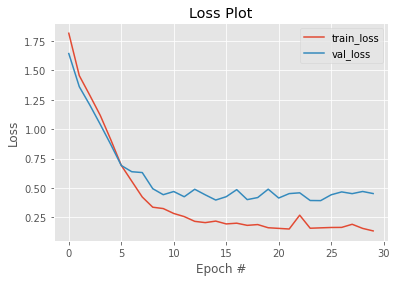

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

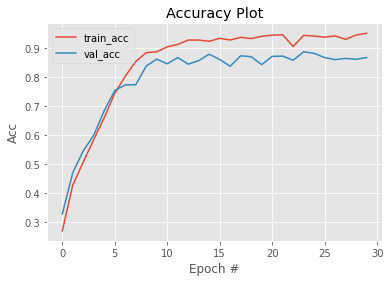

In [24]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), history.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(val_ds)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

57/57 [==============================] - 2s 30ms/step - loss: 0.4530 - acc: 0.8667
Test accuracy: 0.8666666746139526
Test loss: 0.4529648423194885
